In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
matplotlib.rcParams['figure.figsize'] = (10, 10)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
df = pd.read_csv('USvideos.csv')

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# all the columns are very descriptive

In [5]:
df.shape

(40949, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [7]:
# I think column types look great except trending_date and publish_time should be in datime format
# and we will take care of everything in our data cleaning step

In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [9]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [10]:
# We will visualize corr() later so don't worry. Right now, we just want to get the sense of our data before
# we build our data visualization charts

In [11]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [12]:
# The data is very clean. There are 570 null values in
# description but it is common sense and I think we might not need to worry about it at all but will see.

# Data Cleaning

In [13]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [14]:
# let convert trending_date and publish_time into datetime data

In [15]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), datetime64[ns](2), int64(5), object(6)
memory usage: 4.2+ MB


In [17]:
# separates date and time into two columns from 'publish_time' column so we can do our analysis more deeply

In [18]:
df.insert(5, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time

In [19]:
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


In [20]:
# category_id, a nominal attribute, should not carry int data type.

In [21]:
df['category_id'] = df['category_id'].astype(str)

In [22]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [23]:
# notice that category_id is just a number but luckily, we do have category json file to know which
# category name that category_id associates with

In [24]:
# creates a dictionary that maps `category_id` to `category`
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
for index in list(id_to_category)[:10]:
    print(index, id_to_category[index])

1 Film & Animation
2 Autos & Vehicles
10 Music
15 Pets & Animals
17 Sports
18 Short Movies
19 Travel & Events
20 Gaming
21 Videoblogging
22 People & Blogs


In [25]:
df.insert(5,'category', df['category_id'].map(id_to_category))

In [26]:
df[['category_id', 'category']].head()

,category_id,category
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [27]:
# Let check for video_id duplication

In [28]:
df[df.video_id.duplicated()].head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
209,kgaO45SyaO4,2017-11-15,The New SpotMini,BostonDynamics,28,Science & Technology,2017-11-13,20:09:58,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",3701763,56561,2495,11608,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.
217,2kyS6SvSYSE,2017-11-15,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
221,1ZAPwfrtAFY,2017-11-15,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",4632016,131784,9892,18284,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
223,gHZ1Qz0KiKM,2017-11-15,2 Weeks with iPhone X,iJustine,28,Science & Technology,2017-11-13,19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",758998,19138,2272,2873,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
225,jr9QtXwC9vc,2017-11-15,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,Film & Animation,2017-11-13,14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",2671756,12699,505,1010,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."


In [29]:
df[df.video_id == 'kgaO45SyaO4']

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
15,kgaO45SyaO4,2017-11-14,The New SpotMini,BostonDynamics,28,Science & Technology,2017-11-13,20:09:58,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",75752,9419,52,1230,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.
209,kgaO45SyaO4,2017-11-15,The New SpotMini,BostonDynamics,28,Science & Technology,2017-11-13,20:09:58,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",3701763,56561,2495,11608,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.
423,kgaO45SyaO4,2017-11-16,The New SpotMini,BostonDynamics,28,Science & Technology,2017-11-13,20:09:58,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",5531707,72727,3362,14816,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.


A number of videos appear multiple times in our dataset, as they were trending across multiple days. For our purposes, we will remove these duplicated entries for now, and only keep the last entry of each video, as that entry will have to most updated statistics of the corresponding video.

In [30]:
print(df.shape)
df = df.drop_duplicates('video_id', keep='last')
print(df.shape)

(40949, 18)
(6351, 18)


In [40]:
# let double check
df.index.duplicated().any()

False

# Analysis and Visualization

In [31]:
df.columns.values.tolist()

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'category',
 'publish_date',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [32]:
# we will check correlation for ['views', 'likes', 'dislikes', 'comment_count'] columns

In [33]:
check_columns = ['views', 'likes', 'dislikes', 'comment_count']
corr_columns = df[check_columns].corr()
corr_columns

,views,likes,dislikes,comment_count
views,1.000000,0.834639,0.441923,0.573885
likes,0.834639,1.000000,0.420619,0.765288
dislikes,0.441923,0.420619,1.000000,0.734943
comment_count,0.573885,0.765288,0.734943,1.000000


Text(0.5,1,'Correlation Map')

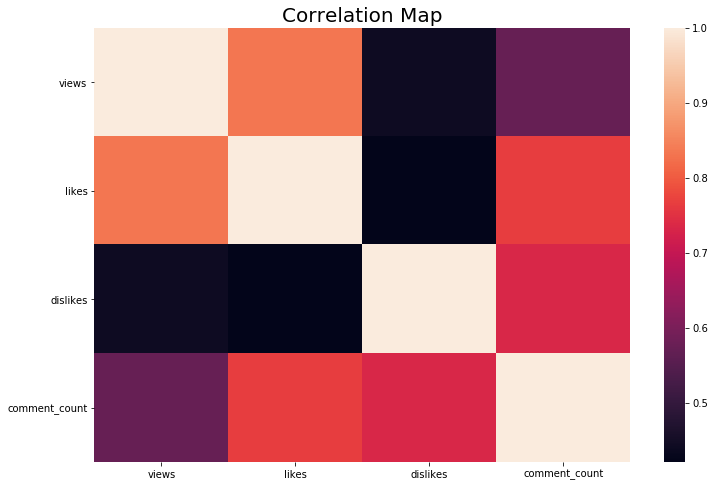

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_columns)
plt.yticks(rotation='horizontal')
plt.title('Correlation Map', size=20)

In [35]:
# There is a strong relationship between views and likes and between comment_count and likes. 
# There is no negative relationship here

#### Let look at top 10 most viewed videos

In [66]:
top_10_viewed_videos = df.sort_values('views', ascending=False).iloc[:10]
top_10_viewed_videos.head(3)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,Music,2018-05-06,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,Entertainment,2017-12-06,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
34708,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,Music,2018-04-20,04:00:03,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...


Text(0,0.5,'Title')

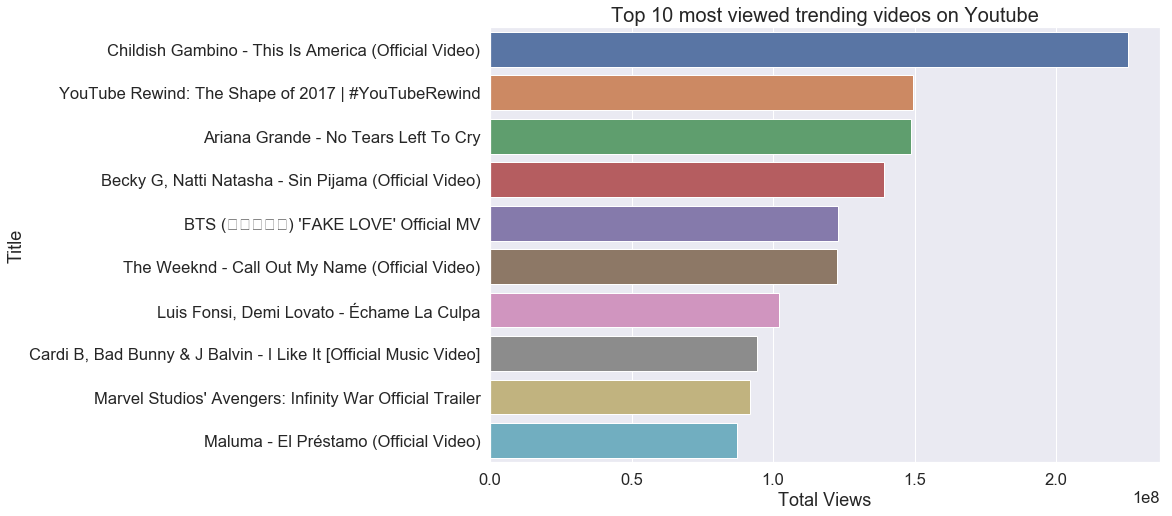

In [64]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(y='title', x='views', data= top_10_viewed_videos)
plt.title('Top 10 most viewed trending videos on Youtube', size=20)
plt.xlabel('Total Views')
plt.ylabel('Title')

In [68]:
# around 230 million views for no.1 trending video and no.2 is around 150 million views which is around
# 80 million views apart from each other

#### Top liked videos

In [69]:
top_10_liked_videos = df.sort_values('likes', ascending=False).iloc[:10]
top_10_liked_videos.head(3)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38273,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,Music,2018-05-18,09:00:02,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,Music,2018-05-06,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
34708,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,Music,2018-04-20,04:00:03,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

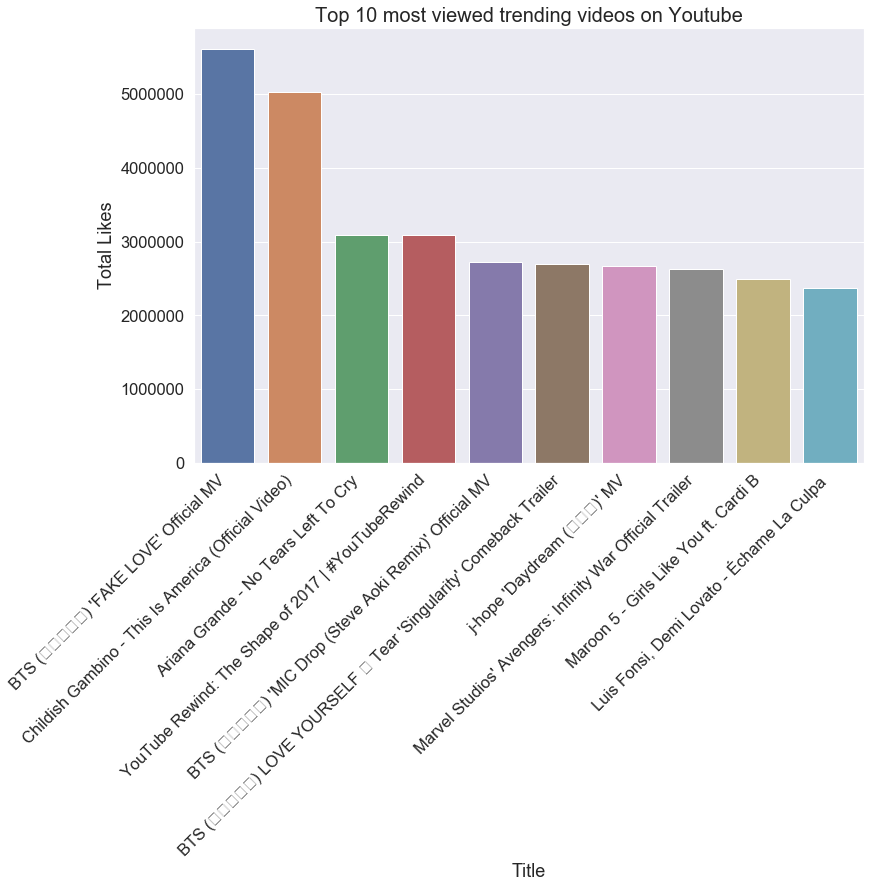

In [97]:
plt.figure(figsize=(12,8))
sns.barplot(x='title', y='likes', data= top_10_liked_videos)
plt.title('Top 10 most viewed trending videos on Youtube', size=20)
plt.xlabel('Title')
plt.ylabel('Total Likes')
plt.xticks(rotation= 45, ha='right')

In [98]:
# The mosted liked video is BTS 'FAKE LOVE' with about 5.6 millions likes

#### Top 10 disliked videos

In [100]:
top_10_disliked_videos = df.sort_values('dislikes', ascending=False).iloc[:10]
top_10_disliked_videos.head(3)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
11323,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,Entertainment,2017-12-06,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
15571,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,Nonprofits & Activism,2018-01-24,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

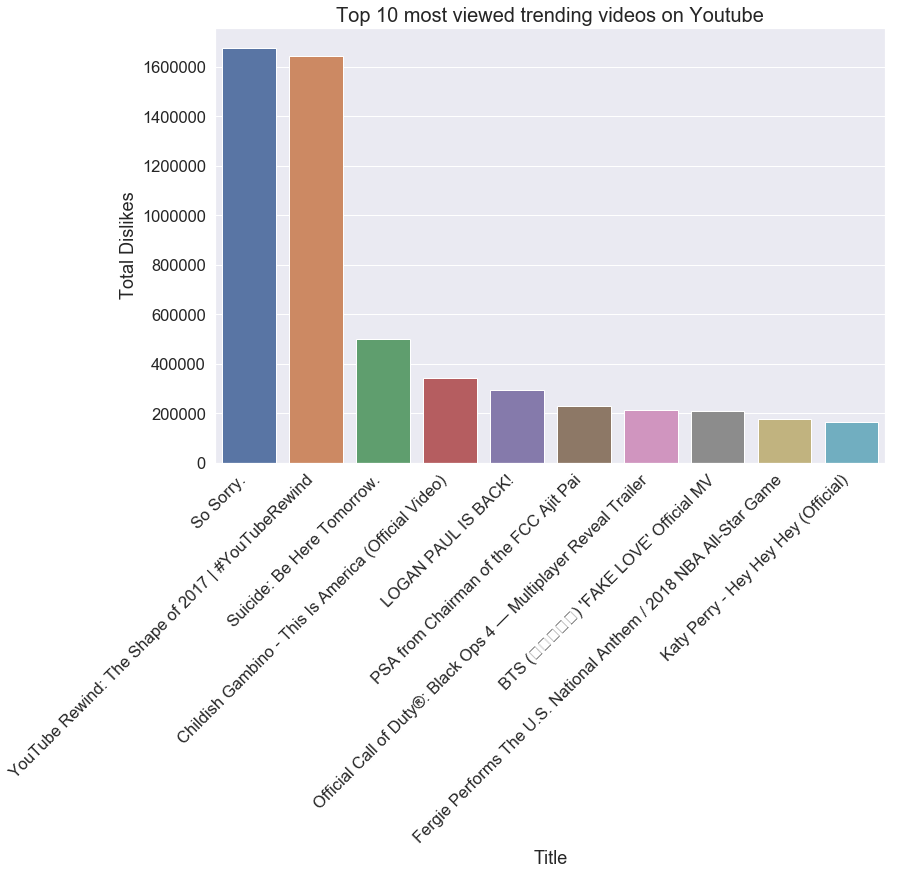

In [102]:
plt.figure(figsize=(12,8))
sns.barplot(x='title', y='dislikes', data= top_10_disliked_videos)
plt.title('Top 10 most viewed trending videos on Youtube', size=20)
plt.xlabel('Title')
plt.ylabel('Total Dislikes')
plt.xticks(rotation= 45, ha='right')

In [105]:
# The mosted disliked video is So Sorry with about 1.6 millions dislikes

In [117]:
# Time for some probability!!!
# I want to know the percentage of 10 most liked videos being in top 10 most disliked videos
# then I want to see if I select randomly 1 video in top 10 most liked videos
# what is the probability of it being in top 10 most disliked videos

In [118]:
like_in_dislike_merged = pd.merge(top_10_liked_videos, top_10_disliked_videos, on='video_id', how='inner')

In [120]:
like_in_dislike_merged.shape

(3, 35)

In [ ]:
# There are 3 out of 10 videos in top 10 most liked videos are also in top 10 most disliked videos. 
# The question is if I select a random video in top 10 most liked videos, 
# what is the probability of it being also in top 10 most disliked videos?

In [123]:
(1 / 10 * 1 / 3) * 100

3.3333333333333335

In [168]:
# 3% probability of video in top 10 liked videos is also in top 10 most disliked videos

#### Likes and Dislikes Ratio for Top 10 Most Liked Videos

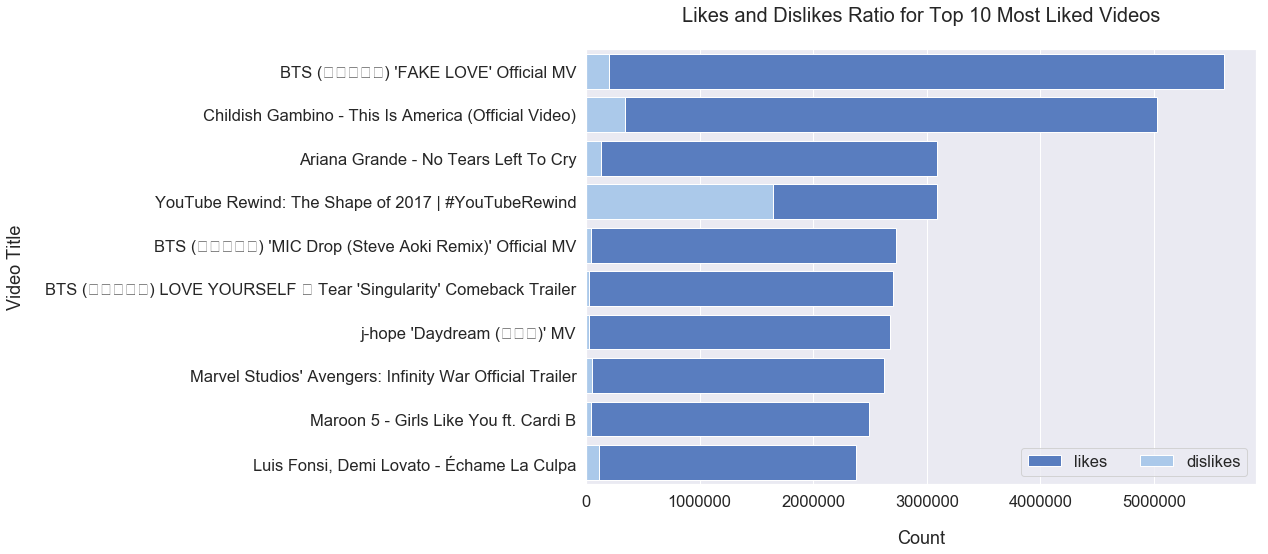

In [161]:
f, ax = plt.subplots(figsize=(12, 8))
sns.set_color_codes("muted")
sns.barplot(x="likes", y="title", data=top_10_liked_videos,
            label="likes", color="b")
sns.set_color_codes("pastel")
sns.barplot(x="dislikes", y="title", data=top_10_liked_videos,
            label="dislikes", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Video Title",
       xlabel="Count")
ax.set_title('Likes and Dislikes Ratio for Top 10 Most Liked Videos\n')
ax.title.set_size(20)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

In [144]:
top_10_liked_videos.likes.sum() / (top_10_liked_videos.likes.sum() + top_10_liked_videos.dislikes.sum())

0.9245994407322019

The ratio of likes to dislikes is 0.92:0.08 which implies that there is a lot of likes in a video in 
top most liked video than dislikes

Just one exception that in YouTube Rewind video, there is more dislikes than like
<br>
Let take a look at likes and dislikes ratio for top 10 most disliked videos

#### Likes and Dislikes Ratio for Top 10 Most Disliked Videos

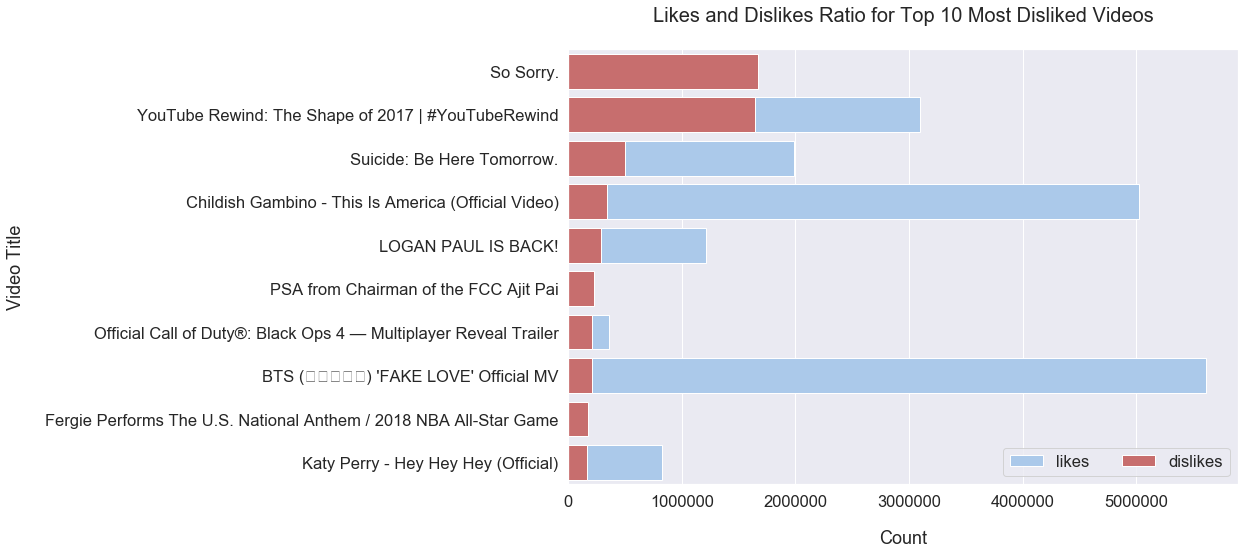

In [167]:
f, ax = plt.subplots(figsize=(12, 8))
sns.set_color_codes("pastel")
sns.barplot(x="likes", y="title", data=top_10_disliked_videos,
            label="likes", color="b")
sns.set_color_codes("muted")
sns.barplot(x="dislikes", y="title", data=top_10_disliked_videos,
            label="dislikes", color="r")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Video Title",
       xlabel="Count")
ax.set_title('Likes and Dislikes Ratio for Top 10 Most Disliked Videos\n')
ax.title.set_size(20)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

We probably might think that most disliked video is the one that has a lot of dislikes compare to likes. However, it doesn't apply in this case. All videos in this category have more likes than dislikes except for just 2 videos.

In [169]:
top_10_disliked_videos.dislikes.sum() / (top_10_disliked_videos.dislikes.sum() + top_10_disliked_videos.likes.sum())

0.21740411462433204

The ratio of dislikes to likes is 0.21:0.79 which implies that there is a still lot of likes in a video in top most disliked video than dislikes

In [170]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,2017-11-13,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,2017-11-12,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


#### Category Count

Text(0.5,1.02,'Category Count')

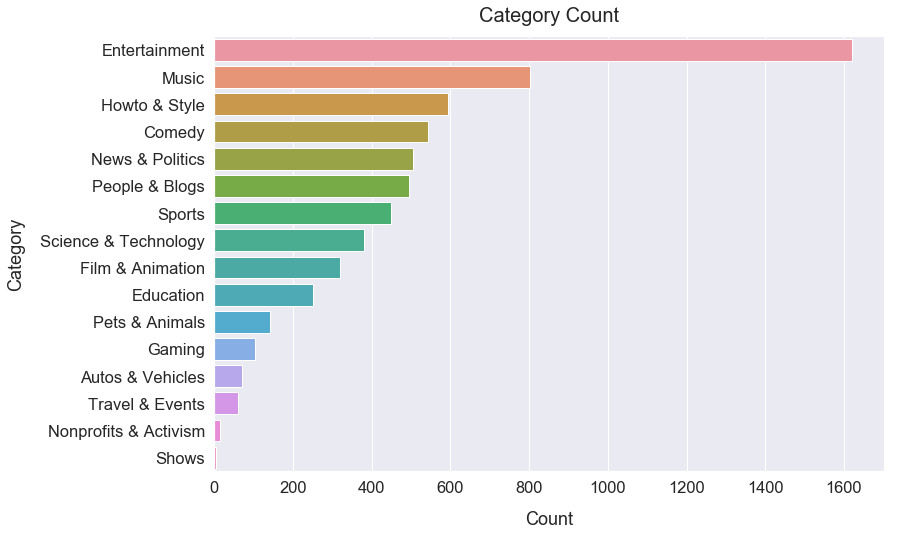

In [222]:
# amount of videos in each category
plt.figure(figsize=(12,8))
ax = sns.countplot(y=df.category, order=df['category'].value_counts().index)
ax.set(xlabel='Count', ylabel='Category')
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
plt.title('Category Count', y=1.02, fontsize=20)

In [233]:
df.category.value_counts() / df.category.value_counts().sum() * 100

Entertainment            25.523540
Music                    12.612187
Howto & Style             9.352858
Comedy                    8.565580
News & Politics           7.935758
People & Blogs            7.794048
Sports                    7.069753
Science & Technology      5.999055
Film & Animation          5.038577
Education                 3.952134
Pets & Animals            2.204377
Gaming                    1.621792
Autos & Vehicles          1.117934
Travel & Events           0.928988
Nonprofits & Activism     0.220438
Shows                     0.062982
Name: category, dtype: float64

In [236]:
# We can see that more than 25% of all trending videos are posted under entertainment category.
# It even has more than total videos combined from no.2 and no.3 category

#### Views distribution by category names

In [243]:
df.groupby('category')['views'].sum()

category
Autos & Vehicles          102913586
Comedy                    773843693
Education                 152579019
Entertainment            2828448275
Film & Animation          814523799
Gaming                    239483937
Howto & Style             557056875
Music                    4828174140
News & Politics           231805196
Nonprofits & Activism      31064609
People & Blogs            667660689
Pets & Animals            104204643
Science & Technology      428430317
Shows                       3049600
Sports                    639389230
Travel & Events            58778988
Name: views, dtype: int64

Text(0.5,1.04,'Total Views by Category Names')

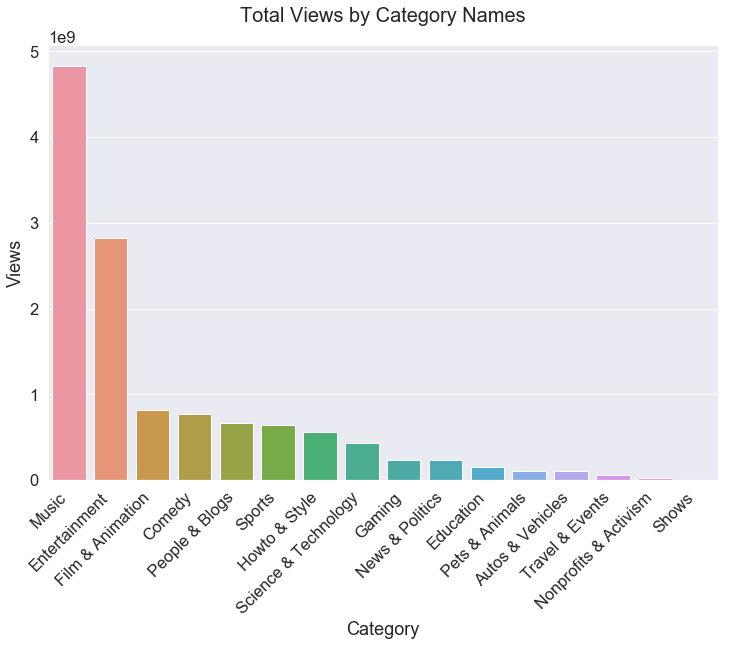

In [286]:
plt.figure(figsize=(12,8))
sns.barplot(x= df.groupby('category')['views'].sum().index, y=df.groupby('category')['views'].sum().values
           ,order= df.groupby('category')['views'].sum().sort_values(ascending= False).index)
plt.xticks(rotation='45',ha='right')
plt.ylabel('Views')
plt.xlabel('Category')
plt.title('Total Views by Category Names', fontsize= 20, y=1.04)

In [280]:
df.groupby('category')['views'].sum().sort_values(ascending= False)

category
Music                    4828174140
Entertainment            2828448275
Film & Animation          814523799
Comedy                    773843693
People & Blogs            667660689
Sports                    639389230
Howto & Style             557056875
Science & Technology      428430317
Gaming                    239483937
News & Politics           231805196
Education                 152579019
Pets & Animals            104204643
Autos & Vehicles          102913586
Travel & Events            58778988
Nonprofits & Activism      31064609
Shows                       3049600
Name: views, dtype: int64

Clearly, Music has the highest views of all categories while News & Politics has the lowest views.

In [305]:
total_views_of_no1_and_2 = df.groupby('category')['views'].sum().sort_values(ascending= False)[:2].sum()

In [306]:
total_views_of_no3_and_below = df.groupby('category')['views'].sum().sort_values(ascending= False)[2:-1].sum()

In [307]:
print(total_views_of_no1_and_2, total_views_of_no3_and_below)
print('Is total views of 1 and 2 greater than 3 and all below :', total_views_of_top2 > total_views_of_top3_and_below)

7656622415 4801734581
Is total views of 1 and 2 greater than 3 and all below : True


In [303]:
df.category.nunique()

16

In [309]:
# We can see how dominant Music and Entertainment categories are on YouTube Trending in term of views
# Their total views combined are greater than the rest of 14 categories combined.
# Shows category performs the least out of all

#### Likes, dislikes, comments in each category

In [319]:
stats_combined_df = df.groupby('category')['likes', 'dislikes', 'comment_count'].sum().reset_index()
stats_combined_df

,category,likes,dislikes,comment_count
0,Autos & Vehicles,730306,46397,123347
1,Comedy,29960684,1067507,2986525
2,Education,5402061,189946,634097
3,Entertainment,67435618,6730482,9899108
4,Film & Animation,16679618,686059,1955501
5,Gaming,6991366,624992,1386717
6,Howto & Style,20646383,705227,2894411
7,Music,150641673,5264504,12865088
8,News & Politics,3011176,769830,1078391
9,Nonprofits & Activism,2388624,563262,740432


Text(0,0.5,'Count')

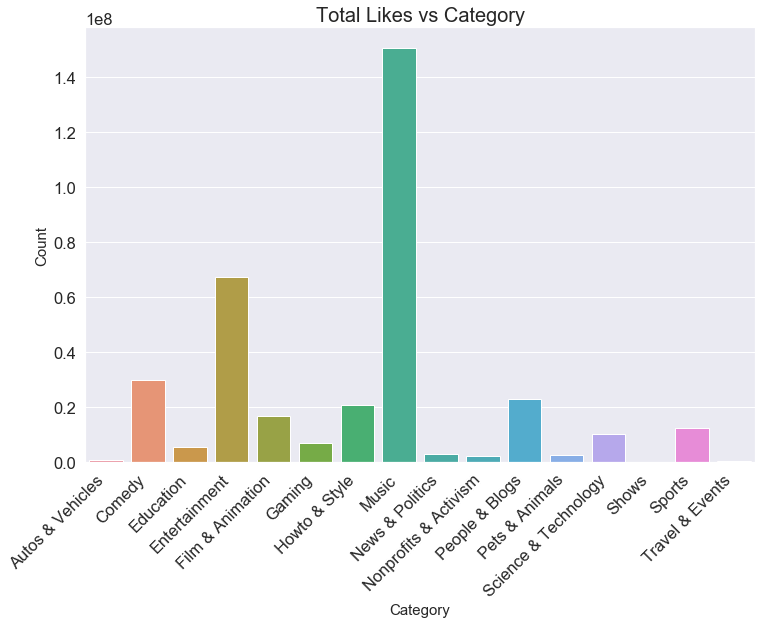

In [428]:
plt.figure(figsize = (12,8))
g = sns.barplot(x = 'category', y='likes', data=stats_combined_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha='right')
g.set_title("Total Likes vs Category", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Text(0,0.5,'Count')

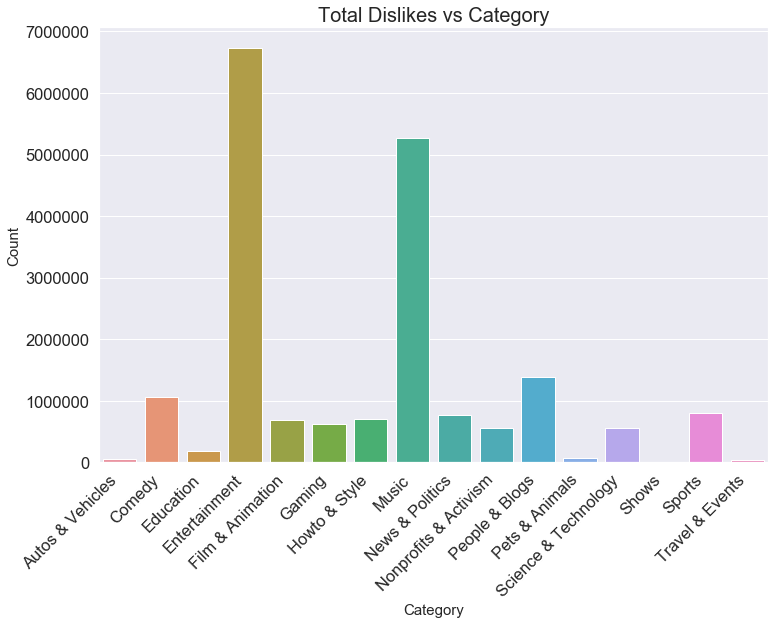

In [427]:
plt.figure(figsize = (12,8))
g1 = sns.barplot(x = 'category', y='dislikes', data=stats_combined_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45, ha='right')
g1.set_title("Total Dislikes vs Category", fontsize=20)
g1.set_xlabel("Category", fontsize=15)
g1.set_ylabel("Count", fontsize=15)

Text(0,0.5,'Count')

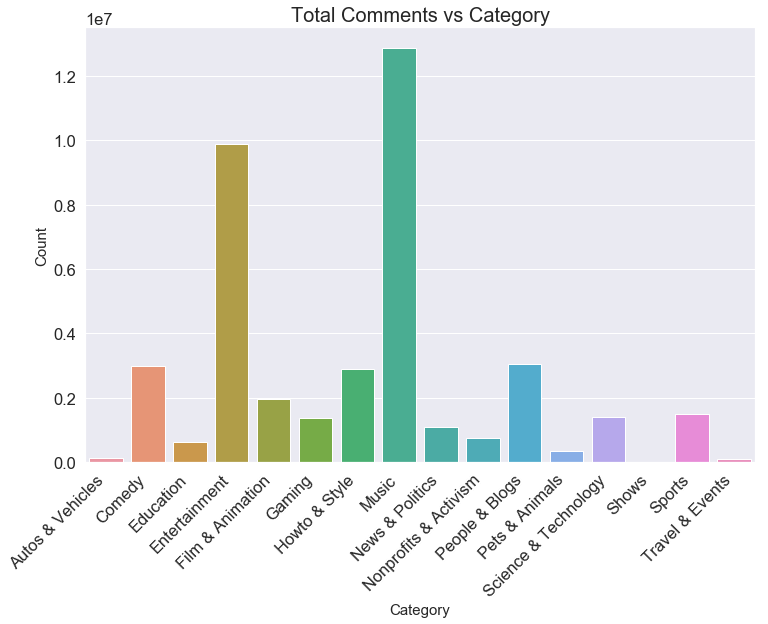

In [429]:
plt.figure(figsize = (12,8))
g2 = sns.barplot(x = 'category', y='comment_count', data=stats_combined_df)
g2.set_xticklabels(g.get_xticklabels(),rotation=45, ha='right')
g2.set_title("Total Comments vs Category", fontsize=20)
g2.set_xlabel("Category", fontsize=15)
g2.set_ylabel("Count", fontsize=15)

In [430]:
# I think we all know how dominant Music and Entertainment are in total views area. However, after
# we ploted 3 charts above, we clearly see they are also dominant in total likes, dislikes, and comments.
# Clearly, they are 2 categories that get a lot of attention in Youtube Trending late 2017 to mid 2018.

#### Engagement rate in each category

In [504]:
# create sum all data frame
sum_all_df = df.groupby('category')['category','views','likes','dislikes','comment_count'].sum().reset_index()

In [505]:
sum_all_df['engagement_rate'] = sum_all_df.iloc[:,2:].sum(axis=1) / sum_all_df.views
sum_all_df.head()

,category,views,likes,dislikes,comment_count,engagement_rate
0,Autos & Vehicles,102913586,730306,46397,123347,0.008746
1,Comedy,773843693,29960684,1067507,2986525,0.043956
2,Education,152579019,5402061,189946,634097,0.040806
3,Entertainment,2828448275,67435618,6730482,9899108,0.029721
4,Film & Animation,814523799,16679618,686059,1955501,0.023721


Text(0.5,1,'Engagement Rate vs Category')

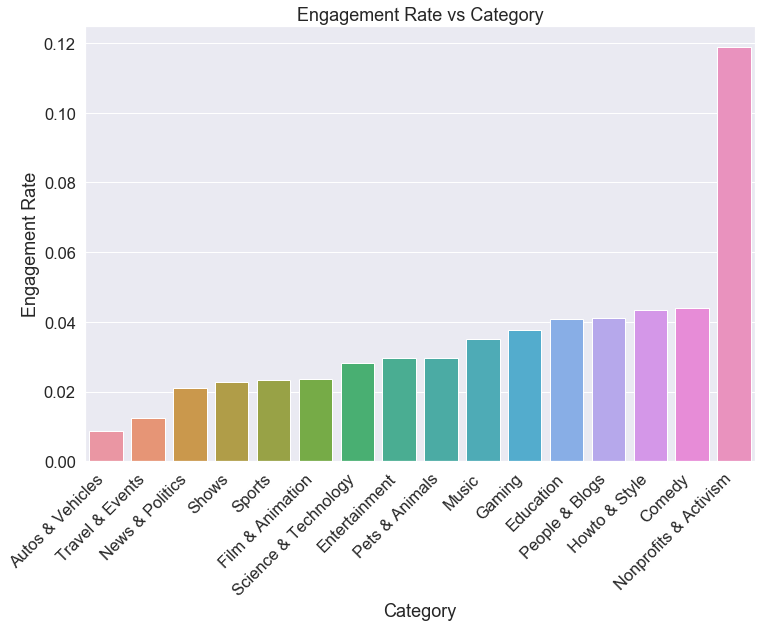

In [511]:
plt.figure(figsize=(12,8))
sns.barplot(x='category', y= 'engagement_rate', data=sum_all_df, order=sum_all_df.sort_values('engagement_rate').category)
plt.xlabel('Category')
plt.xticks(rotation='45', ha='right')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate vs Category')

In [514]:
# At first you might think how on earth that neither Music nor Entertainment has the highest
# engagement rate?
# This is what I think: 1st, both of them have large number of views and everytime 
# we watch videos, views could increase depend on how YouTube algorithm works. However, each of us 
# can only like/dislike once. 
# 2nd, although we can comment as many as we want, which'll lead to high engagement rate, not many people
# want to comment multiple times.
# 3rd, always keep in mind that audience might only watch a video once, then decide to leave a 
# like/dislike or a comment and don't come back to watch it again. As a result, higher views does not 
# guarentee higher engagement rate. 


#### Like and Dislike Ratio in each category

In [518]:
# I think it would be great to know which category has the highest like to dislike ratio so let find out!

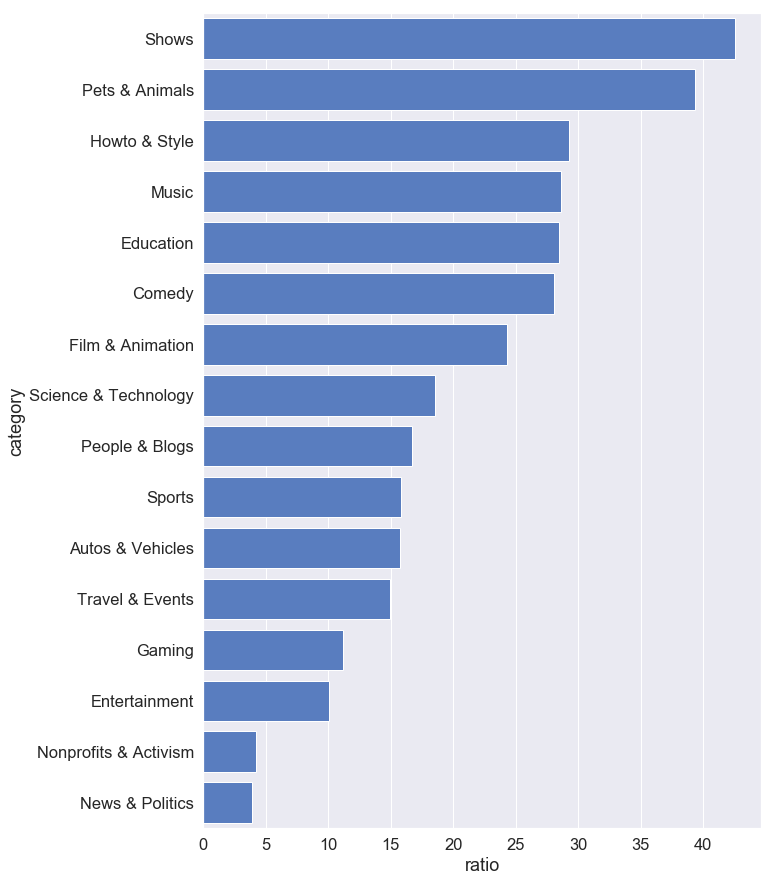

In [519]:
like_dislike_ratio = df.groupby('category')['likes'].agg('sum') / df.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

In [522]:
# Shows videos have highest likes-dislikes ratio.
# Not suprisingly, people find difficult to hate on shows. While News & Politics is where people will 
# display their opinions

In [524]:
# to be continue with NLP analysis ....